
# Introduction to Data Analysis and Visualization

[&larr; Back](.)


Python provides very intutive and powerful tools for data analysis. In this lesson, we'll learn the concepts and see how to apply those to get insights from the data.

In [8]:
# show graphs in the notebooks and some config to make to look better

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (8,4)
plt.style.use('ggplot')

%matplotlib inline

## Numpy

Numpy is the numerical computation library in Python and this is the basis for most scientific computing and data science tools in Python. It is not only a building block, but many of these tools inherit the API of numpy for vector operatons and data selection. Understanding numpy closely helps us to use those tools better.

While you may not deal with numpy array directly, this knowledge will be useful in working with most data analysis tools in Python.

In this section, we'll learn about the following things about numpy arrays:

- creation of multi-dimentional arrays 
- reshaping them
- vector operations
- indexing

In [9]:
import numpy as np

Numpy is a libray that provide a multi-dimentional array interface, with very elegant API.

Let's start with creating a simple 1-dimentional array. Unlike lists in Python, all the elements of a numpy array will be of the same type.

In [10]:
x = np.array([1, 2, 3, 4, 5])

In [11]:
x

array([1, 2, 3, 4, 5])

In [12]:
x.shape

(5,)

In [13]:
x.dtype

dtype('int64')

Every array in numpy has a `dtype` and a `shape`. The `dtype` indicates the datatype of each element in the array and shape indicates the length of the array in each dimension as a tuple.

In [14]:
x = np.array([0.1, 0.2, 0.3])

In [15]:
x.dtype

dtype('float64')

In [16]:
# create a float64 array with given numbers
x = np.array([1, 2, 3, 4], dtype=np.float64)

In [17]:
x

array([1., 2., 3., 4.])

In [18]:
x.dtype

dtype('float64')

We can create a two dimentional array as well.

In [19]:
d = np.array([
    [1, 2, 3],
    [4, 5, 6]])

In [20]:
d

array([[1, 2, 3],
       [4, 5, 6]])

In [21]:
d.shape

(2, 3)

In [22]:
d.dtype

dtype('int64')

### Utilties foc creating arrays

Numpy provides some utilities for creating arrays.

Create an array of zeros.

In [23]:
np.zeros(4)

array([0., 0., 0., 0.])

In [24]:
np.zeros((2, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [25]:
# create a 1-d array of size 6 and reshape it 2-d array of size 2x3
np.zeros(6).reshape(2, 3)

array([[0., 0., 0.],
       [0., 0., 0.]])

In [41]:
# create a 1-d array of size 24 and reshape it 3-d array of size 2x3x4
np.zeros(24).reshape(2, 3, 4)

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

You can also create an array of ones.

In [32]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [33]:
x = np.ones(10)

In [34]:
x.dtype

dtype('float64')

In [38]:
x = np.ones(10, dtype=np.int8)

In [39]:
x

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int8)

In [40]:
x.dtype

dtype('int8')

Or a range of numbers using `np.arange` which works like `range`, but returns a numpy array.

In [28]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [29]:
np.arange(1, 2, 0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

In [30]:
np.arange(1, 2, 0.1).reshape(2, 5)

array([[1. , 1.1, 1.2, 1.3, 1.4],
       [1.5, 1.6, 1.7, 1.8, 1.9]])

#### Problem: Create a 3-d numpy array

Create a numpy array of shape (5, 4, 3) with all zeros.

### Vector operations

The most interesting part of numpy arrays is the vector operations.

In [44]:
x = np.arange(1, 5)

In [45]:
x

array([1, 2, 3, 4])

When we use arthemetic operations on numpy arrays, those operations work on each element. 

In [46]:
x + 10

array([11, 12, 13, 14])

In [47]:
x * 2

array([2, 4, 6, 8])

In [48]:
# python lists work differently
[1, 2, 3, 4] * 2

[1, 2, 3, 4, 1, 2, 3, 4]

In [49]:
x * x

array([ 1,  4,  9, 16])

In [50]:
x ** x

array([  1,   4,  27, 256])

In [51]:
2 * x / 3

array([0.66666667, 1.33333333, 2.        , 2.66666667])

How to compute sum of squares of all numbers below one million?

In [52]:
x = np.arange(1000000)
np.sum(x*x)

333332833333500000

Numpy is high-performance. The core computation engine is written in C language.

In [53]:
%%timeit
x = np.arange(1000000)
np.sum(x*x)

3.95 ms ± 167 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Compare the same with the simple python implementation.

In [54]:
%%timeit
x = range(1000000)
sum([i * i for i in x])

115 ms ± 5.89 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Notice that numpy is about 30X faster than the pure python version in this case.

```{note}
The `timeit` is a jupyterlab magic command to find the time taken to execute a block of code.

It executes the block of code multiple times and reports the mean time along with standard deviation across runs.
```

#### Example: Computing Euclidian Distance

Euclidian distance between two vectors is defines as:
    

$E(p,q) = \sqrt{\Sigma_{i=1}^{n}{(p_{i}-q_{i})^2}}$


Write a function `euclidian_distance` to compute the euclidian distance between two vectors specified as numpy arrays.


In [61]:
def euclidian_distance(p, q):
    d = p-q
    total = np.sum(d*d)
    return np.sqrt(total)

In [62]:
p = np.array([1.0, 2.0, 3.0])
q = np.array([4.0, 5.0, 6.0])

In [63]:
np.sqrt(np.sum((p-q)**2))

5.196152422706632

In [64]:
euclidian_distance(p, q)

5.196152422706632

In [65]:
euclidian_distance(p, p)

0.0

#### Problem: Manhattan Distance

Write a function `manhattan_distance` to compute the manhattan distance between two vectors.

The manhattan distance is defined as:

    
$M(p,q) = \Sigma_{i=1}^{n}{|pi−qi|}$

For more info see: <https://en.wikipedia.org/wiki/Taxicab_geometry>


```
>>> manhanttan_distance(np.array([0,0]), np.array([3, 4]))
7
```

Hint: See [numpy.abs][].

[numpy.abs]: https://numpy.org/doc/stable/reference/generated/numpy.absolute.html



In [66]:
x = np.array([-1.0, 0.5, -0.5])

In [67]:
x

array([-1. ,  0.5, -0.5])

In [68]:
np.abs(x)

array([1. , 0.5, 0.5])

In [69]:
def manhanttan_distance(p, q):
    ...

In [71]:
p = np.array([0, 0, 0, 0])
q = np.array([1, -2, 3, 4])

manhanttan_distance(p, q) # 10

### Indexing and Slicing

Numpy provides interesting ways to select individual elements and parts of the array to enable operations on a subset of an array. 

In the following examples, we are going to use the variable `x` for 1-d array and variable `d` for a 2-d array.

In [72]:
x = np.arange(1, 5, 0.5, dtype=np.float64)

In [73]:
x

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [74]:
d = x.reshape(2, 4)

In [75]:
d

array([[1. , 1.5, 2. , 2.5],
       [3. , 3.5, 4. , 4.5]])

We can access elements from a 1-d array just like a list.

In [76]:
x[0]

1.0

In [77]:
x[1]

1.5

When dealing with multi-dimentional arrays, we can specify a value for each dimension.

In [81]:
d

array([[1. , 1.5, 2. , 2.5],
       [3. , 3.5, 4. , 4.5]])

In [78]:
d[0, 0]

1.0

In [79]:
d[0, 1]

1.5

In [80]:
d[1, 3]

4.5

We can also slice numpy arrays.

In [83]:
x

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [82]:
x[:4]

array([1. , 1.5, 2. , 2.5])

In [84]:
x[4:]

array([3. , 3.5, 4. , 4.5])

The same rule applies for multi-dimentional arrays too, just that we need to specify value for bith dimensions.

In [86]:
d = np.arange(0, 12, 0.5).reshape(4, 6)

In [87]:
d

array([[ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5],
       [ 3. ,  3.5,  4. ,  4.5,  5. ,  5.5],
       [ 6. ,  6.5,  7. ,  7.5,  8. ,  8.5],
       [ 9. ,  9.5, 10. , 10.5, 11. , 11.5]])

In [88]:
# top left corner
d[:2, :3]

array([[0. , 0.5, 1. ],
       [3. , 3.5, 4. ]])

In [93]:
# bottom right corner?
d[2:, 3:]

array([[ 7.5,  8. ,  8.5],
       [10.5, 11. , 11.5]])

In [89]:
# Row 0
d[0, :] 

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [90]:
# Row 0
d[0]

array([0. , 0.5, 1. , 1.5, 2. , 2.5])

In [91]:
# Column 0
d[:, 0]

array([0., 3., 6., 9.])

Another interesting feature of numpy is boolean indexing. 

In [94]:
x

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [95]:
x > 2

array([False, False, False,  True,  True,  True,  True,  True])

When we evaluate a boolean expression on an array, it is also considered as a vector operation and we get an array back.

The interesting thing is we can use that to select only the elements where there is `True` in the index.

For example, the following expression returns all the elements which are greater than 2.

In [96]:
x[x > 2]

array([2.5, 3. , 3.5, 4. , 4.5])

We could also use this to make some operations on them. For example. we want to double all the numbers that are greater than 2.

In [97]:
x[x > 2] *= 2

In [98]:
x

array([1. , 1.5, 2. , 5. , 6. , 7. , 8. , 9. ])

It is too boring and confusing to understand indexing just by staring numbers. Let's take an example of a gray-scale image and see how these operations impact it.

### Example: Gray Scale Image

We'll use a sample image from scipy.

We are going to use matplotlib to display the image


In [100]:
import matplotlib.pyplot as plt
import scipy

In [101]:
face = scipy.datasets.face(gray=True)

In [102]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ...,
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [103]:
face.shape

(768, 1024)

The shape is approximately 800x1000. We'll use these numbers as approximation to make our computaion easy.

In [104]:
# function to show an image using matplotlib
def show(img):
    plt.imshow(img, cmap=plt.cm.gray)

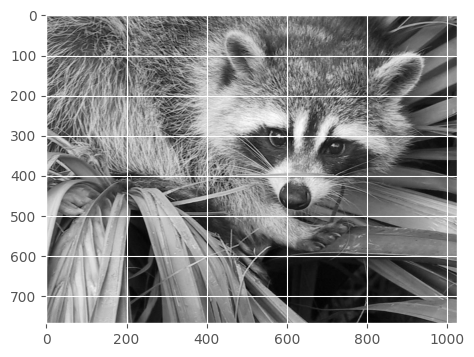

In [105]:
show(face)

**How to negate the image?**

Each value in the array is between 0 to 255. What would we get if we try `255 - face`?

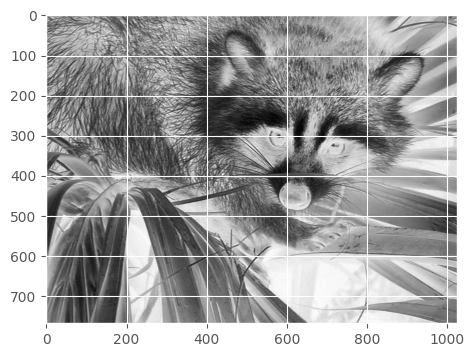

In [106]:
show(255 - face)

**How to get the top-half of the face?**

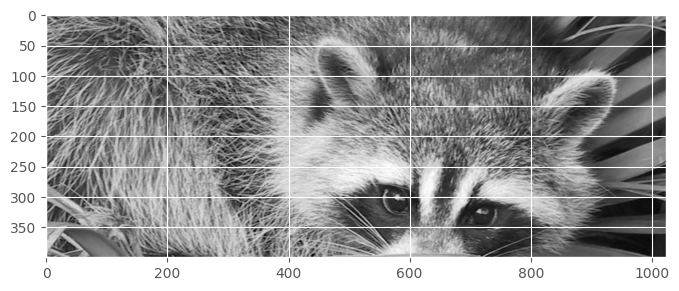

In [107]:
show(face[:400, :]) # a bit more than half, just lazy to compute height/2

**How to get the bottom half?**

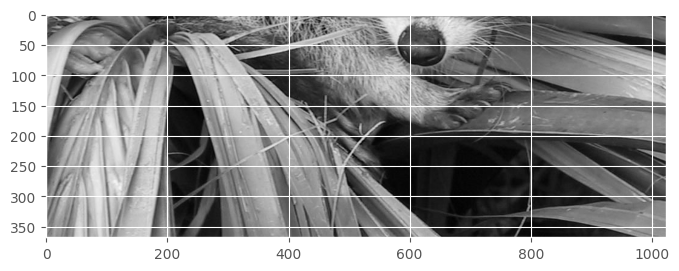

In [108]:
show(face[400:, :])

**How to get the left half?**

**How to get the right half**

**Skip 100 pixels on all sides**

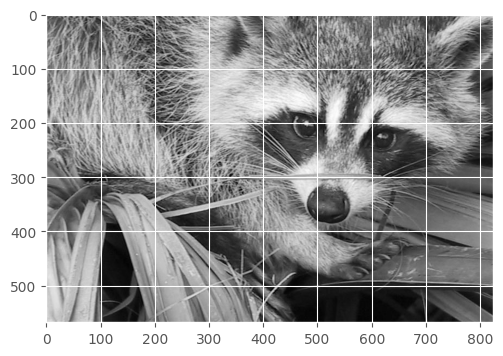

In [109]:
show(face[100:-100, 100:-100])

How to flip the image vertically?

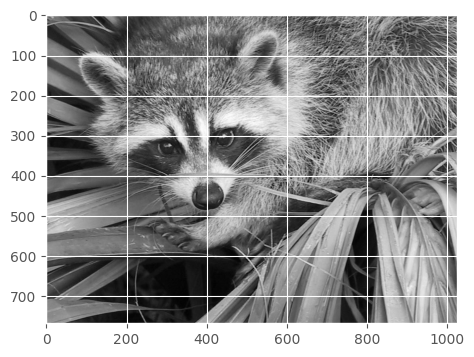

In [113]:
show(face[:, ::-1])

And flip horizontally...

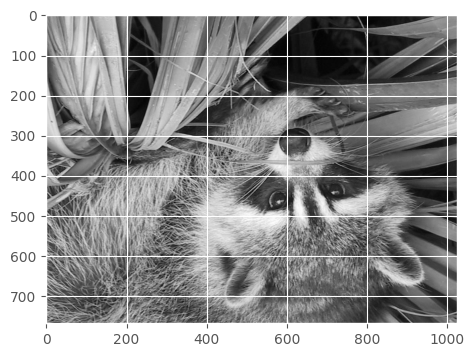

In [114]:
show(face[::-1, :])

**Add 10px border**

We'll just replace the 10 pixels on all sides with black.

In [110]:
face1 = face.copy() # make a copy because we are modifying it

In [111]:
face1[:10, :] = 0
face1[-10:, :] = 0
face1[:, :10] = 0
face1[:, -10:] = 0

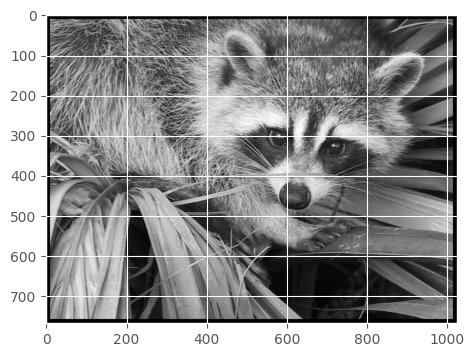

In [112]:
show(face1)

Can you try adding a 10px outer border with black color and another 10 px inner border with white color?

**Make the image sharp**

Turn all colors less than 200 to 0.

In [ ]:
face1 = face.copy()

In [ ]:
face1[face1 < 200] = 0

In [ ]:
show(face1)

## Pandas

Pandas is library to work with tabular data in Python. In another words, Pandas is spereadsheet tool for hackers.

Pandas mainly has two classes `Series` and `DataFrame`. A `DataFrame` represents a tabular dataset and `Series` represents a column.

In [115]:
import pandas as pd

Let's start with a sample dataset.

In [116]:
df = pd.read_csv("shared/un-min.csv")

Let's see the first few rows of the dataframe.

In [117]:
df.head()

,country,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
0,Afghanistan,Asia,45.0,46.0,154,2848
1,Albania,Europe,68.0,74.0,32,863
2,Algeria,Africa,67.5,70.3,44,1531
3,Angola,Africa,44.9,48.1,124,355
4,Argentina,America,69.6,76.8,22,8055


In [118]:
len(df)

188

In [119]:
df.columns

Index(['country', 'region', 'lifeMale', 'lifeFemale', 'infantMortality',
       'GDPperCapita'],
      dtype='object')

In [120]:
df.dtypes

country             object
region              object
lifeMale           float64
lifeFemale         float64
infantMortality      int64
GDPperCapita         int64
dtype: object

Pandas automatically infers the datatype when reading a csv file.

All the categorical columns with string values will be of type `object`. 

In [121]:
df.describe()

,lifeMale,lifeFemale,infantMortality,GDPperCapita
count,188.000000,188.000000,188.000000,188.000000
mean,63.526064,68.309043,44.308511,5890.595745
std,9.820235,11.085095,38.896964,8917.273130
min,36.000000,39.100000,3.000000,36.000000
25%,57.275000,58.625000,12.000000,426.500000
50%,66.500000,71.950000,30.500000,1654.500000
75%,70.675000,76.250000,71.250000,6730.500000
max,77.400000,82.900000,169.000000,42416.000000


### Accessing individual columns

Columns can be accessed using `.` or `[]`. The `.` notation works only when the column name doesn't have space or other special characters.

In [122]:
df.infantMortality

0      154
1       32
2       44
3      124
4       22
      ... 
183     37
184     80
185     19
186    103
187     68
Name: infantMortality, Length: 188, dtype: int64

In [ ]:
df["infantMortality"]

The columns are like numpy arrays and we can do vector operations on them. 

For example we can compute the avarage life expectency between male and female by taking average of them.

In [123]:
(df.lifeMale + df.lifeFemale)/2

0      45.50
1      71.00
2      68.90
3      46.50
4      73.20
       ...  
183    67.25
184    57.90
185    72.55
186    42.95
187    48.50
Length: 188, dtype: float64

How many regions are there?

In [124]:
df.region.head()

0       Asia
1     Europe
2     Africa
3     Africa
4    America
Name: region, dtype: object

In [125]:
df.region.unique()

array(['Asia', 'Europe', 'Africa', 'America', 'Oceania'], dtype=object)

In [126]:
df.region.nunique()

5

In [127]:
df.region.value_counts()

Africa     53
Asia       46
Europe     40
America    35
Oceania    14
Name: region, dtype: int64

### Index

Pandas supports having a row index and it is handy to keep an index when there is a column with unique name for each name.

In [129]:
df.set_index("country", inplace=True)

In [130]:
df.head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Afghanistan,Asia,45.0,46.0,154,2848
Albania,Europe,68.0,74.0,32,863
Algeria,Africa,67.5,70.3,44,1531
Angola,Africa,44.9,48.1,124,355
Argentina,America,69.6,76.8,22,8055


```{note}
In most methods on dataframes return a new dataframe instead of modifying the same dataframe. Passing `inplace=True` changes that behavior to update the dataframe inplace. 

Instead of using `inplace=True`, we could also do the following, but that would be more confusing.

    df = df.set_index("country")
```

We can reset the index by calling `reset_index` method. Again, we need to pass `inplace=True` if we want to modify the dataframe.

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.head()

Let's put the index back the rest of our exploration.

In [ ]:
df.set_index("country", inplace=True)

In [ ]:
df.head()

We can access the index using `df.index`.

In [131]:
df.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       ...
       'United.States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Viet.Nam', 'Yemen', 'Yugoslavia', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=188)

In [132]:
df.index[:5]

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina'], dtype='object', name='country')

### Visualization

> "A picture is worth a thousand words" 


How is the wealth distributed across the world?

array([[<Axes: title={'center': 'GDPperCapita'}>]], dtype=object)

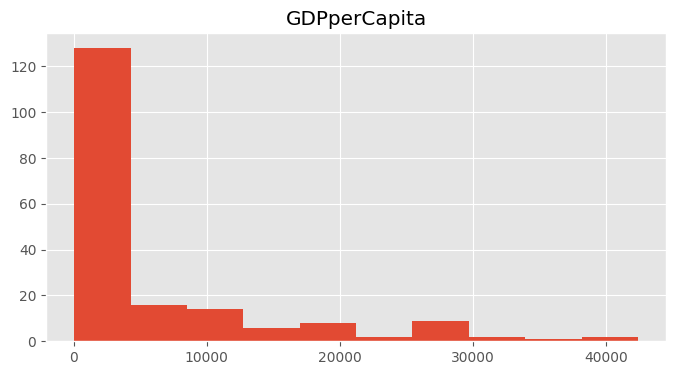

In [133]:
df.hist("GDPperCapita")

In [ ]:
# we can also call histogram on the column
df.GDPperCapita.hist()

<Axes: >

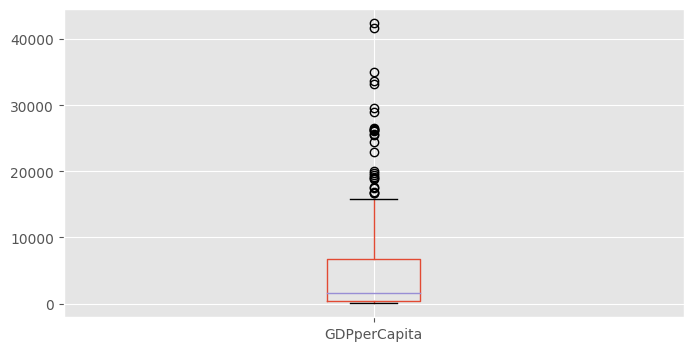

In [134]:
df.boxplot("GDPperCapita")

Does wealth corelate with health?

<Axes: xlabel='GDPperCapita', ylabel='infantMortality'>

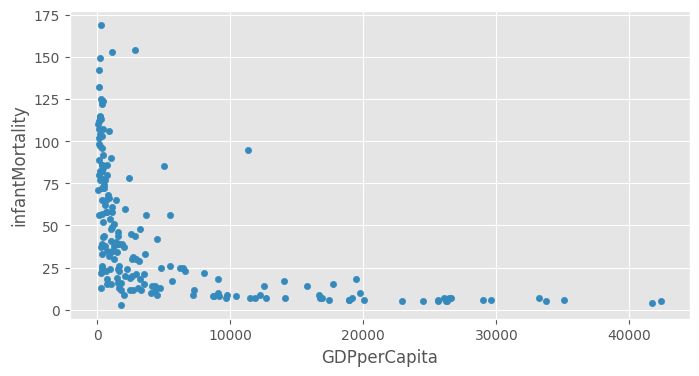

In [135]:
df.plot(kind="scatter", x="GDPperCapita", y="infantMortality")

#### Problem: Plot lifeMale vs. lifeFemale

### Sorting values

Lot of times we want to order data based on a column to see the top few values. 

What are the top-10 rich countries.

In [136]:
df.sort_values("GDPperCapita")

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Sudan,Africa,53.6,56.4,71,36
Mozambique,Africa,45.5,48.4,110,77
Ethiopia,Africa,48.4,51.6,107,96
Eritrea,Africa,49.1,52.1,98,96
Dem.Rep.of.the.Congo,Africa,51.3,54.5,89,117
...,...,...,...,...,...
Denmark,Europe,73.0,78.3,7,33191
Norway,Europe,74.8,80.6,5,33734
Luxembourg,Europe,73.1,79.7,6,35109


In [137]:
df.sort_values("GDPperCapita", ascending=False).head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Switzerland,Europe,75.3,81.8,5,42416
Japan,Asia,76.9,82.9,4,41718
Luxembourg,Europe,73.1,79.7,6,35109
Norway,Europe,74.8,80.6,5,33734
Denmark,Europe,73.0,78.3,7,33191


In [138]:
df.sort_values("GDPperCapita", ascending=False).head().index

Index(['Switzerland', 'Japan', 'Luxembourg', 'Norway', 'Denmark'], dtype='object', name='country')

<Axes: xlabel='country'>

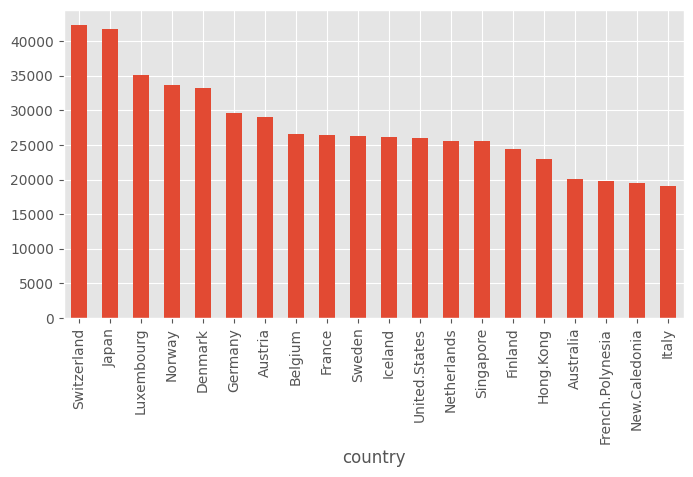

In [139]:
(df.GDPperCapita
 .sort_values(ascending=False)
 .head(20)
 .plot(kind="bar"))

#### Problem: What are the 10 poorest countries?

#### Problem: What are the 10 counties with really bad infantMortality?

### Group By

Group By is a powerful tool to summarize values on a column.

In this example we have data by country, what if we want to summarize the data by the region?

In [140]:
df.head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Afghanistan,Asia,45.0,46.0,154,2848
Albania,Europe,68.0,74.0,32,863
Algeria,Africa,67.5,70.3,44,1531
Angola,Africa,44.9,48.1,124,355
Argentina,America,69.6,76.8,22,8055


In [141]:
df.groupby("region").mean()

,lifeMale,lifeFemale,infantMortality,GDPperCapita
region,,,,
Africa,52.052830,55.286792,86.320755,1217.641509
America,69.082857,74.474286,26.657143,5080.085714
Asia,65.373913,69.439130,43.782609,5453.195652
Europe,70.362500,77.545000,11.575000,12860.050000
Oceania,67.464286,72.092857,24.642857,7131.785714


Notice that the index has become the column on which we did group by. Also, all the categorical columns are ignored on group by.

In [142]:
df_region = df.groupby("region").mean()

<Axes: xlabel='region'>

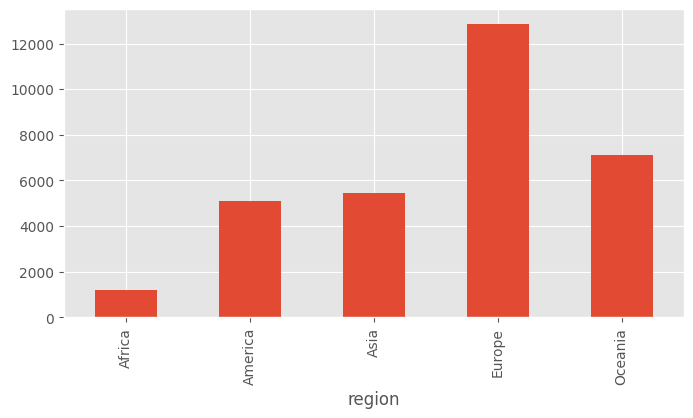

In [143]:
df_region.GDPperCapita.plot(kind="bar")

### Selecting Rows

A lot of times, we want to work on a subset of the dataset to drill down for specific insights.

The vector operations that we learnt in numpy comes handy here. 

In [144]:
df_africa = df[df.region == "Africa"]

In [145]:
df_africa.head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Algeria,Africa,67.5,70.3,44,1531
Angola,Africa,44.9,48.1,124,355
Benin,Africa,52.4,57.2,84,391
Botswana,Africa,48.9,51.7,56,3640
Burkina.Faso,Africa,45.1,47.0,97,165


<Axes: xlabel='GDPperCapita', ylabel='infantMortality'>

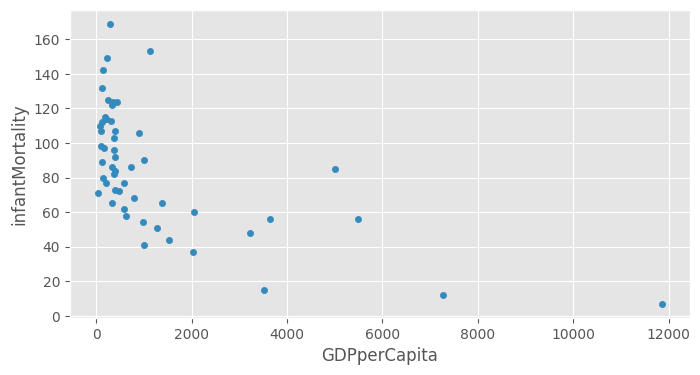

In [146]:
df_africa.plot(kind="scatter", x="GDPperCapita", y="infantMortality")

Let's select poor countries.

<Axes: >

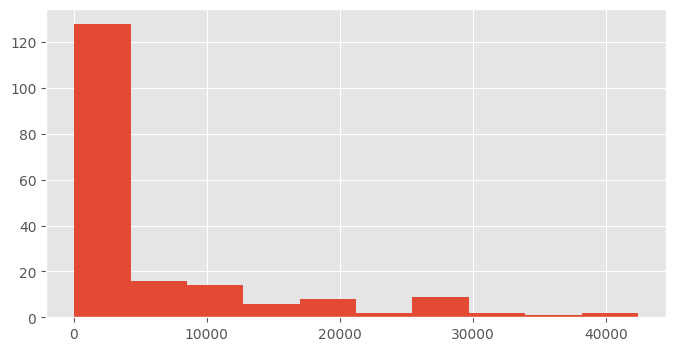

In [147]:
df.GDPperCapita.hist()

In [148]:
df_poor = df[df.GDPperCapita < 1000]

In [149]:
df_poor.head()

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Albania,Europe,68.0,74.0,32,863
Angola,Africa,44.9,48.1,124,355
Armenia,Europe,67.2,74.0,25,354
Azerbaijan,Asia,66.5,74.5,33,321
Bangladesh,Asia,58.1,58.2,78,280


In [150]:
len(df_poor)

73

In [151]:
len(df)

188

Which regions have more poor countries?

In [153]:
df_poor.region.value_counts()

Africa     39
Asia       20
Europe      6
America     6
Oceania     2
Name: region, dtype: int64

#### Problem: Find the poor countries in Europe?

Find the countries in Europe that has GDPperCapita less than 1000.

In [154]:
df[(df.GDPperCapita < 1000) & (df.region == "Europe")]

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Albania,Europe,68.0,74.0,32,863
Armenia,Europe,67.2,74.0,25,354
Belarus,Europe,64.4,74.8,15,994
Bosnia,Europe,70.5,75.9,13,271
Moldova,Europe,63.5,71.5,26,383
Ukraine,Europe,63.6,74.0,18,694


#### Drilling down Further

Let's look at the wealth vs health graph again.

In [ ]:
df.plot(kind="scatter", x="GDPperCapita", y="infantMortality")

Which are the countries that are rich, but not doing well on health?

In [155]:
df[(df.GDPperCapita > 1000) & (df.infantMortality > 100)]

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Afghanistan,Asia,45.0,46.0,154,2848
Liberia,Africa,50.0,53.0,153,1124


Which are the countries that are not that rich, but not well on health?

In [156]:
df[(df.GDPperCapita < 500) & (df.infantMortality < 50)]

,region,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,,,,,
Armenia,Europe,67.2,74.0,25,354
Azerbaijan,Asia,66.5,74.5,33,321
Bosnia,Europe,70.5,75.9,13,271
Georgia,Asia,68.5,76.7,23,343
Korea.Dem.Peoples.Rep,Asia,68.9,75.1,22,271
Kyrgyzstan,Asia,63.4,71.9,39,331
Moldova,Europe,63.5,71.5,26,383
Nicaragua,America,65.8,70.6,44,464
Uzbekistan,Asia,64.3,70.7,43,435


### Problem: Find the countries which have large gap between lifeMale vs. lifeFemale

For reference look at the scatter plot of lifeMale vs. lifeFemale.

In [ ]:
df.plot(kind="scatter", x="lifeMale", y="lifeFemale")

In [157]:
df.plot?